#  Análisis Predictivo para la Toma de Decisiones Estratégicas en RRHH  


👤 **Autor:** John Leonardo Vargas Mesa  
🔗 [LinkedIn](https://www.linkedin.com/in/leonardovargas/) | [GitHub](https://github.com/LeStark)  

## 📂 Repositorio en GitHub  
- 📓 **Notebooks:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/01%20-%20An%C3%A1lisis%20predictivo%20para%20toma%20de%20decisiones%20RRHH)  
- 📑 **Data sets:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/00%20-%20Data/01%20-%20RRHH)  
---

# 📘 Notebook 2 – Predicción de Competencias Blandas en RRHH

En este notebook trabajaremos con un dataset de Recursos Humanos adaptado con variables que representan atributos de los colaboradores en una organización.  

El objetivo ahora será aplicar técnicas de **regresión lineal** para predecir el nivel de **competencias blandas** a partir de otras características de los empleados.

## 📂 Estructura del Dataset

El dataset contiene información de colaboradores descrita con las siguientes variables:

- **Años de experiencia**: tiempo acumulado en el mercado laboral.  
- **Formación continua**: nivel de educación y capacitación permanente.  
- **Competencias técnicas**: habilidades asociadas al desempeño profesional específico.  
- **Competencias blandas**: habilidades sociales, comunicativas y de liderazgo (variable a predecir).  
- **Perfil de talento**: clasificación del empleado (ej. *Innovador, Ejecutor, Tradicionalista*).  

## 🎯 Objetivos del Notebook
- Construir un modelo de **regresión lineal** para predecir las competencias blandas.  
- Evaluar el desempeño del modelo con métricas de regresión (MAE, RMSE, R²).  
- Visualizar la relación entre valores reales y valores predichos.  
- Reflexionar sobre el potencial y limitaciones de aplicar modelos de regresión en datos de Recursos Humanos.  

## 🛠️ Herramientas a utilizar
- **pandas** y **numpy**: manipulación de datos.  
- **matplotlib** y **seaborn**: visualización de resultados.  
- **scikit-learn**: construcción y evaluación del modelo de regresión lineal.  

➡️ Al finalizar este notebook, tendrás un **modelo predictivo capaz de estimar el nivel de competencias blandas** de un colaborador en función de sus características de experiencia, formación y competencias técnicas.

In [ ]:
# Instalación de librerías necesarias
# 
# En esta celda instalamos las principales librerías que usaremos a lo largo del notebook:
# - pandas: para manipulación y análisis de datos.
# - numpy: para operaciones numéricas y manejo de arreglos.
# - matplotlib: para visualizaciones básicas.
# - seaborn: para visualizaciones estadísticas más estilizadas.
# - scikit-learn: para construir y evaluar modelos de machine learning.
#
# Esta celda solo necesita ejecutarse una vez (o cuando el entorno no tenga estas librerías instaladas).

!pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
# Librerías necesarias

# 🔹 Manipulación y análisis de datos
import pandas as pd
import numpy as np

# 🔹 Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Preprocesamiento y modelado
from sklearn.model_selection import train_test_split   # División en train y test
from sklearn.linear_model import LinearRegression      # Modelo de regresión lineal

# 🔹 Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
# 📥 Cargar dataset
url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/00%20-%20Data/01%20-%20RRHH/iris_human_resources.csv"
df = pd.read_csv(url, sep=",")
df.info()  # Información del dataset
df.head()  # Mostrar las primeras filas del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Años de experiencia    150 non-null    float64
 1   Formación continua     150 non-null    float64
 2   Competencias técnicas  150 non-null    float64
 3   Competencias blandas   150 non-null    float64
 4   Perfil de talento      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,Años de experiencia,Formación continua,Competencias técnicas,Competencias blandas,Perfil de talento
0,5.1,3.5,1.4,0.2,Innovador
1,4.9,3.0,1.4,0.2,Innovador
2,4.7,3.2,1.3,0.2,Innovador
3,4.6,3.1,1.5,0.2,Innovador
4,5.0,3.6,1.4,0.2,Innovador


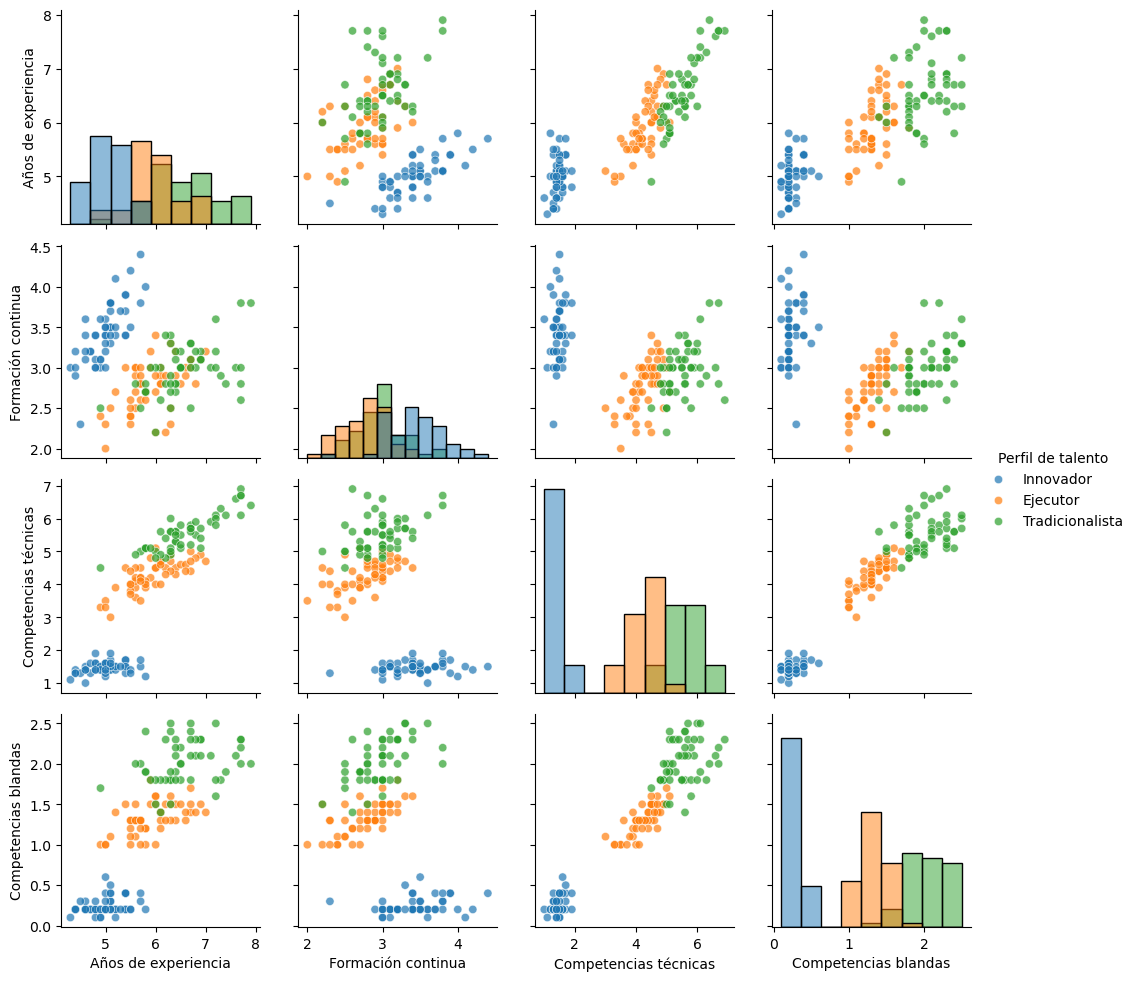

In [3]:
# Versión PairGrid
g = sns.PairGrid(df, hue="Perfil de talento")
g.map_diag(sns.histplot, kde=False)  # Histogramas en la diagonal
g.map_offdiag(sns.scatterplot, alpha=0.7)  # Scatter plots fuera de la diagonal
g.add_legend()  # Agregar leyenda

plt.show()

##  Análisis del Pairplot: ¿Tiene sentido aplicar Regresión Lineal para predecir Competencias Blandas?

Al observar el *pairplot* que relaciona las diferentes variables del dataset de RRHH, podemos destacar lo siguiente:

### 1. Años de experiencia vs. Competencias blandas
Existe una relación positiva, aunque no perfectamente lineal. 
Se observa que los colaboradores clasificados como **Tradicionalistas** tienden a concentrarse en valores más altos tanto de experiencia como de competencias blandas.

### 2. Formación continua vs. Competencias blandas
La relación es más dispersa, pero se aprecia una ligera tendencia creciente. 
Esto sugiere que la formación continua podría aportar cierta capacidad predictiva, aunque no tan fuerte como otras variables.

### 3. Competencias técnicas vs. Competencias blandas
Aquí encontramos la relación más clara: **una correlación positiva fuerte y casi lineal**.
Los empleados con mayor nivel de competencias técnicas suelen presentar también mayores competencias blandas.

###  Implicaciones para aplicar Regresión Lineal
- La **fuerte relación lineal entre competencias técnicas y competencias blandas** respalda la pertinencia de usar un modelo de regresión lineal.  
- Incluir **años de experiencia** y **formación continua** como predictores adicionales puede aportar información complementaria, aunque su relación con la variable objetivo sea menos evidente.  
- La regresión lineal es un buen punto de partida: sencilla de interpretar, rápida de entrenar y útil como modelo de referencia (*baseline*).  

### Consideraciones
- La relación no es perfectamente lineal en todas las variables, por lo que habrá cierto nivel de error.  
- Es posible que modelos más complejos (ej. Random Forest, SVR) capturen mejor las relaciones no lineales.  


## Preparación de los datos para el modelado

Antes de construir un modelo predictivo es necesario preparar adecuadamente los datos.  
En esta etapa realizamos los siguientes pasos:

1. **Separación de variables (features y target)**  
   - **X**: incluye todas las características independientes (*años de experiencia, formación continua, competencias técnicas*).  
   - **y**: corresponde a la variable objetivo que deseamos predecir: *competencias blandas*.  
   - La columna *Perfil de talento* se excluye porque en este escenario no será usada como predictor.  

2. **Normalización / Estandarización de las features**  
   - Usamos `StandardScaler` para transformar todas las variables predictoras a la misma escala.  
   - Cada variable queda con **media = 0** y **desviación estándar = 1**.  
   - Esto evita que una variable con valores más grandes (por ejemplo, *años de experiencia*) domine sobre otras.  

In [4]:
# Preparación de los datos para modelado

# 1. Separar features (X) y target (y)
X = df.drop(["Competencias blandas","Perfil de talento"], axis=1)   # Variables independientes
y = df["Competencias blandas"]               # Variable objetivo


# 3. Normalización/Estandarización de las features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Verificación de la transformación
print("\nPrimeras 5 filas de las variables normalizadas:")
print(X_scaled[:5])


Primeras 5 filas de las variables normalizadas:
[[-0.90068117  1.01900435 -1.34022653]
 [-1.14301691 -0.13197948 -1.34022653]
 [-1.38535265  0.32841405 -1.39706395]
 [-1.50652052  0.09821729 -1.2833891 ]
 [-1.02184904  1.24920112 -1.34022653]]


## División del dataset

Separamos los datos en **entrenamiento (75%)** y **prueba (25%)** usando `train_test_split`.  
- El conjunto de entrenamiento sirve para que el modelo aprenda.  
- El conjunto de prueba se reserva para evaluar su desempeño en datos no vistos.  
- Con `random_state=42` garantizamos que la partición sea reproducible.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Construcción del modelo de Regresión Lineal

Creamos una instancia del modelo `LinearRegression()` de *scikit-learn* y lo entrenamos con los datos de entrenamiento (`X_train`, `y_train`).  

En esta etapa, el modelo aprende la relación entre las variables predictoras (años de experiencia, formación continua, competencias técnicas, etc.) y la variable objetivo (*competencias blandas*).  


In [6]:
# Construir modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Predicciones

Usamos el modelo entrenado para generar predicciones sobre el conjunto de prueba (`X_test`).  
De esta forma obtenemos `y_pred`, que contiene los valores estimados de *competencias blandas* para los colaboradores que el modelo no había visto antes.  


In [7]:
#  Predicciones
y_pred = lin_reg.predict(X_test)

In [8]:
print("Predicciones:", y_pred)

Predicciones: [1.56948936 0.29934695 2.31152377 1.51093206 1.45183669 0.16735221
 1.12500784 1.66208899 1.29057674 1.18835839 1.78452414 0.16258586
 0.05981869 0.21634455 0.33874745 1.6429268  2.11190718 1.18836914
 1.55991365 1.97990168 0.34356757 1.72598296 0.31906871 1.97990168
 2.28751995 1.74034654 1.94051732 2.14117239 0.16258586 0.29459673
 0.14340216 0.33871518 1.3347167  0.36804492 0.25573967 1.60835718
 1.48642782 0.24081115]


## Coeficientes (betas) del modelo

En un modelo de **Regresión Lineal**, cada variable predictora tiene asociado un coeficiente β (beta) que indica su influencia sobre la variable objetivo (*competencias blandas*).  

- **Intercepto (β₀):** valor estimado de *competencias blandas* cuando todas las variables predictoras son cero.  
- **Coeficientes (β₁, β₂, …):** representan cuánto cambia el valor esperado de *competencias blandas* por cada unidad de aumento en la variable correspondiente, manteniendo las demás constantes.  

Al organizar los resultados en un DataFrame podemos identificar:  
- Qué variables tienen mayor impacto en la predicción.  
- Si su efecto es **positivo** (incrementan las competencias blandas) o **negativo** (las reducen).  

Esto nos permite interpretar el modelo más allá de su precisión, entendiendo cómo cada característica de los colaboradores contribuye a explicar su nivel de competencias blandas.


In [9]:
# 📊 Obtener coeficientes (betas) del modelo
betas = pd.DataFrame({
    "Variable": X_train.columns,
    "Beta (coeficiente)": lin_reg.coef_
})

print("Intercepto (β₀):", lin_reg.intercept_)
print("\nBetas (coeficientes):")
print(betas)


Intercepto (β₀): -0.1491639103657152

Betas (coeficientes):
                Variable  Beta (coeficiente)
0    Años de experiencia           -0.244881
1     Formación continua            0.244827
2  Competencias técnicas            0.537641


## 📏 Evaluación del modelo de regresión

Una vez obtenidas las predicciones, debemos medir qué tan bien se ajusta nuestro modelo a los datos reales.  
Para ello utilizamos varias métricas de error y desempeño:

- **MAE (Mean Absolute Error – Error Absoluto Medio):**  
  Promedio de las diferencias absolutas entre los valores reales y los predichos.  
  Indica, en promedio, cuánto se equivoca el modelo en las unidades originales de la variable objetivo.  
  Cuanto más bajo, mejor.

- **MSE (Mean Squared Error – Error Cuadrático Medio):**  
  Promedio de los errores elevados al cuadrado.  
  Penaliza con más fuerza los errores grandes, por lo que es sensible a valores atípicos.  
  Un valor bajo indica mejor ajuste.

- **RMSE (Root Mean Squared Error – Raíz del Error Cuadrático Medio):**  
  Es la raíz cuadrada del MSE, lo que devuelve el error en las mismas unidades que la variable objetivo.  
  Es más interpretable que el MSE y también penaliza errores grandes.

- **R² (Coeficiente de determinación):**  
  Mide qué proporción de la variabilidad de los datos es explicada por el modelo.  
  Toma valores entre 0 y 1:  
  - **1** significa que el modelo explica el 100% de la variabilidad.  
  - **0** significa que el modelo no explica nada (equivalente a predecir siempre la media).  
  Valores cercanos a 1 indican un modelo con buen poder predictivo.
 


In [10]:
# Evaluación del modelo
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.14562912201188968
MSE: 0.0404946663706515
RMSE: 0.20123286603000887
R²: 0.9368671270670574


## Segunda versión del modelo: incluyendo *Perfil de talento*

En la primera versión del modelo usamos únicamente variables numéricas (*años de experiencia, formación continua y competencias técnicas*) para predecir el nivel de *competencias blandas*.  

Ahora repetiremos el proceso de modelado, pero esta vez **incluiremos la variable categórica *Perfil de talento*** como predictor.  

Para poder usarla en el modelo, fue transformada mediante **One-Hot Encoding**, lo que generó nuevas columnas binarias (0/1) que representan cada perfil (*Ejecutor* y *Tradicionalista*, dejando a *Innovador* como categoría de referencia).  

El objetivo es evaluar si al añadir esta información el modelo logra un **mejor ajuste** y explica una mayor parte de la variabilidad de *competencias blandas*.


## Transformación de la variable categórica *Perfil de talento*

Para poder incluir la variable **Perfil de talento** en un modelo de regresión, debemos convertirla en un formato numérico.  
Si la codificáramos como números simples (0, 1, 2), el modelo interpretaría una relación ordinal inexistente entre los perfiles, lo que introduciría sesgos.  

La solución es aplicar **One-Hot Encoding**, que crea columnas binarias (0/1) para cada categoría.  
En nuestro caso, al aplicar `drop="first"`, se eliminó una categoría de referencia para evitar la **multicolinealidad** (problema conocido como *dummy variable trap*).  

### Pasos realizados en la celda:
1. **Definición del encoder:**  
   Se inicializa `OneHotEncoder` con `drop="first"` y `sparse_output=False` para obtener un DataFrame denso y legible.  

2. **Transformación:**  
   Se aplica el encoder sobre la columna *Perfil de talento*, generando un arreglo con variables dummy.  

3. **Creación del DataFrame codificado:**  
   Se construye un DataFrame (`perfil_encoded_df`) con nombres de columnas claros como:  
   - `Perfil de talento_Ejecutor`  
   - `Perfil de talento_Tradicionalista`  

4. **Concatenación:**  
   Se combinan las variables numéricas originales con las columnas dummy, resultando en `df_encoded`.  



In [14]:
from sklearn.preprocessing import OneHotEncoder


#  One-Hot Encoding para la variable categórica "Perfil de talento"
encoder = OneHotEncoder(drop="first",sparse_output=False)  

# Transformar la columna y convertir a DataFrame
perfil_encoded = encoder.fit_transform(df[["Perfil de talento"]])

# Crear DataFrame con las variables dummy
perfil_encoded_df = pd.DataFrame(
    perfil_encoded,
    columns=encoder.get_feature_names_out(["Perfil de talento"]),
    index=df.index   # mantener alineación con el DataFrame original
)

# Concatenar con el DataFrame original
df_encoded = pd.concat([df.drop("Perfil de talento", axis=1), perfil_encoded_df], axis=1)
df_encoded.info()  # Información del DataFrame transformado
df_encoded.head()  # Mostrar las primeras filas del DataFrame transformado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Años de experiencia                150 non-null    float64
 1   Formación continua                 150 non-null    float64
 2   Competencias técnicas              150 non-null    float64
 3   Competencias blandas               150 non-null    float64
 4   Perfil de talento_Innovador        150 non-null    float64
 5   Perfil de talento_Tradicionalista  150 non-null    float64
dtypes: float64(6)
memory usage: 7.2 KB


,Años de experiencia,Formación continua,Competencias técnicas,Competencias blandas,Perfil de talento_Innovador,Perfil de talento_Tradicionalista
0,5.1,3.5,1.4,0.2,1.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0


## Definición de variables y división del dataset

En esta etapa preparamos los datos para el modelado:

1. **Definir variables predictoras (X) y objetivo (y):**  
   - **X** → contiene todas las características numéricas, incluidas las dummies generadas con *One-Hot Encoding*.  
   - **y** → corresponde a la variable que queremos predecir: *competencias blandas*.  

2. **División en entrenamiento y prueba:**  
   Utilizamos `train_test_split` para separar el dataset:  
   - **75%** de los datos para entrenamiento (`X_train`, `y_train`).  
   - **25%** para prueba (`X_test`, `y_test`).  



In [15]:
# Definir X (variables predictoras) y y (variable objetivo)
X = df_encoded.drop("Competencias blandas", axis=1)   # Todas las variables excepto la target
y = df_encoded["Competencias blandas"]                # Variable a predecir

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,        # 25% para test, 75% para entrenamiento
    random_state=42,       # Semilla para reproducibilidad
)

# Verificamos tamaños
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (112, 5)
Tamaño de X_test: (38, 5)
Tamaño de y_train: (112,)
Tamaño de y_test: (38,)


## Entrenamiento y predicciones

Dividimos los datos en entrenamiento y prueba, entrenamos un modelo de **Regresión Lineal** y generamos predicciones sobre el conjunto de prueba.  
Finalmente, creamos un DataFrame para comparar los valores reales de *competencias blandas* con los valores predichos.


In [16]:
#  Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 🏗️ Construir modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 🔮 Predicciones
y_pred = lin_reg.predict(X_test)

results_df = pd.DataFrame({
    "Valor real (y_test)": y_test.values,
    "Predicción (y_pred)": y_pred
}).reset_index(drop=True)

results_df.head()


,Valor real (y_test),Predicción (y_pred)
0,1.2,1.433471
1,0.3,0.320201
2,2.3,2.121292
3,1.5,1.418808
4,1.4,1.362594


##  Evaluación del modelo

Calculamos métricas de error (**MAE, MSE, RMSE**) y el coeficiente de determinación (**R²**) para medir la precisión y capacidad explicativa del modelo de regresión.


In [17]:
# 📊 Evaluación del modelo
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.11867536511849823
MSE: 0.024695662128547305
RMSE: 0.15714853524149472
R²: 0.9614984332779583
